In [ ]:
## Importar librerias 

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
## Cargamos los datos  

df = pd.read_excel('Datos_201901_202009.xlsx')
print(df.head())

In [ ]:
print(df.describe())

In [ ]:
print(df.info())

In [ ]:
print(df.isna().sum())

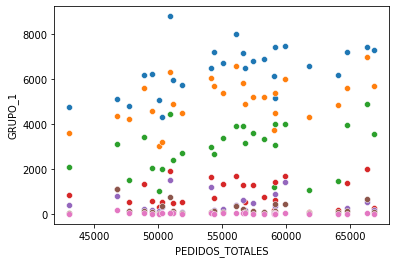

In [32]:
for i in range(1,8):
    sns.scatterplot(data=df, x='PEDIDOS_TOTALES', y= f'GRUPO_{i}',)

## Observamos el comportamiento de los pedidos totales (21 dias) en funcion a las ventas por grupo de los 3 primeros dias.
## Se observa que tienen un comportamiento lineal y = mx + b

In [39]:
## Se aplica un Modelo de Regresion Lineal para hallar los coeficientes de la ecuacion
## y = mx1x1 + ... m10x10 + b // m = coeficiente, x = ventas por grupos

X = df.iloc[:,1:11]
y =df['PEDIDOS_TOTALES']
X_train, X_test, y_train,y_test = train_test_split(X,y)


lin = LinearRegression()
lin.fit(X_train,y_train)

y_pred = lin.predict(X_test)
print(y_pred)

coef = lin.coef_
print(coef)


ecuacion = pd.DataFrame((zip)(X.columns,coef), columns =['grupo','coeficiente m'])
ecuacion = ecuacion.append({'grupo':'intercepto b','coeficiente m':lin.intercept_},ignore_index=True)
print(ecuacion)

[50697.55486518 43053.05611426 50481.15007143 58822.63460827
 62769.04602476 54019.50073021 48232.02033071]
[ 5.12232602e+00  3.77279858e-02  3.27078371e+00 -5.16491939e+00
 -9.64641690e+00  1.19330462e+01 -2.73430010e+02  2.94614854e+01
  4.68014240e+01  6.52521369e+01]
        grupo  coeficiente m
0     GRUPO_1       5.122326
1     GRUPO_2       0.037728
2     GRUPO_3       3.270784
3     GRUPO_4      -5.164919
4     GRUPO_5      -9.646417
5     GRUPO_6      11.933046
6     GRUPO_7    -273.430010
7     GRUPO_8      29.461485
8     GRUPO_9      46.801424
9    GRUPO_10      65.252137
10  intercept   23342.292179
